In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


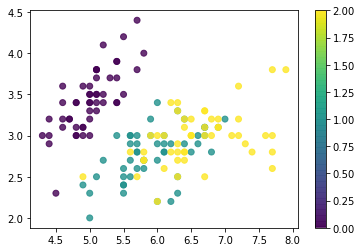

In [4]:
iris = load_iris()

X= iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)
plt.colorbar()

In [5]:
# train_test_split
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) #test_size = 20% of data 
                                                                                         #random_state = controler l'aléatoire

print('X_train', X_train.shape)
print('X_test', X_test.shape)

X_train (120, 4)
X_test (30, 4)


In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
kn = KNeighborsClassifier(n_neighbors=2)

In [9]:
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [12]:
kn.score(X_test,y_test)

1.0

In [14]:
#Cross Validation
from sklearn.model_selection import cross_val_score

In [16]:
#Le score pour chaque découpage
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 0.95833333, 0.91666667, 0.95833333, 1.        ])

In [17]:
#------Validation Curve: il est possible de tracer une courbe performances selon les variations d'un hyperparamètre 
                                                                                            # (par ex: n_neighbors)
from sklearn.model_selection import validation_curve

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


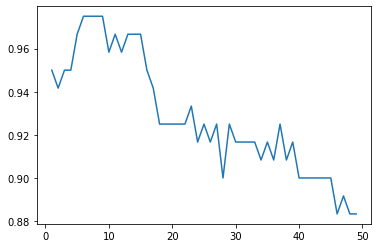

In [23]:
model = KNeighborsClassifier()
neighbors_param = np.arange(1,50)

train_score, val_score = validation_curve(KNeighborsClassifier(), X_train, y_train, 'n_neighbors',neighbors_param, cv = 5)

plt.plot(neighbors_param, val_score.mean(axis=1)) #les meilleurs résultats sont là quand: n_neighbors = 7 ou 8 ou 9

In [24]:
#-------------GridSearchCV: 
from sklearn.model_selection import GridSearchCV

In [25]:
#Créer un dictionnaire de chaque hyperparamètre avec les différentes valeurs qu'ils peuvent prendre
param_grid = { 'n_neighbors': np.arange(1,20),
                'metric': ['euclidean', 'manhattan']    
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

In [27]:
grid.fit(X_train,y_train)   #entraîner notre modèle avec les diff combinaisons des hyperparamètres

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [28]:
grid.best_score_    #voir le meilleur score parmi ces combinaisons

0.975

In [29]:
grid.best_params_  #voir les hyperparamètres qui retournent les meilleurs résultats

{'metric': 'euclidean', 'n_neighbors': 6}

In [30]:
model = grid.best_estimator_   #enregistrer le modèle avec les meilleurs hyperparams dans un objet 

In [32]:
model.score(X_test,y_test)     #tester le modèle sur le test_set

0.9666666666666667

In [33]:
#------------------Confusion Matrix
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test, model.predict(X_test)) #Class1   9        0      0
                                                #class2   0        9      1     >> ds la class2 9 ont été bien prédits, et 1 non
                                                #class3   0        0      11
                                                        #class1 class2 class3

array([[ 9,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 11]], dtype=int64)

In [37]:
#------------Learning curve---------
from sklearn.model_selection import learning_curve

In [45]:
N, train_score, val_score = learning_curve(model, X_train,y_train, train_sizes= np.linspace(0.1,1,10), cv=5)

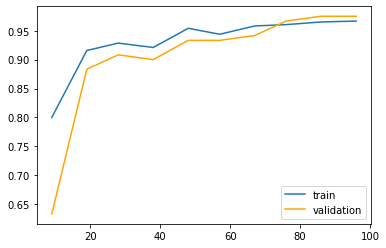

In [46]:
plt.plot(N, train_score.mean(axis = 1), label = 'train')
plt.plot(N, val_score.mean(axis=1), label= 'validation', c='orange')
plt.legend()